<a href="https://colab.research.google.com/github/Shivachikkonda02/-Bank-Marketing-Analysis-and-Classification-ML-Project/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['target']=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [24]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

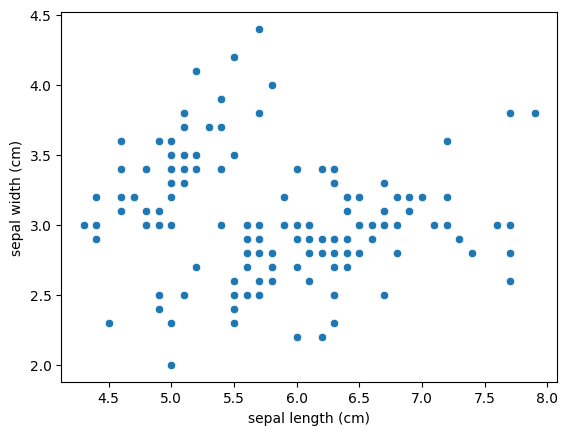

In [27]:
import seaborn as sns
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=df)

In [28]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [30]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [32]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

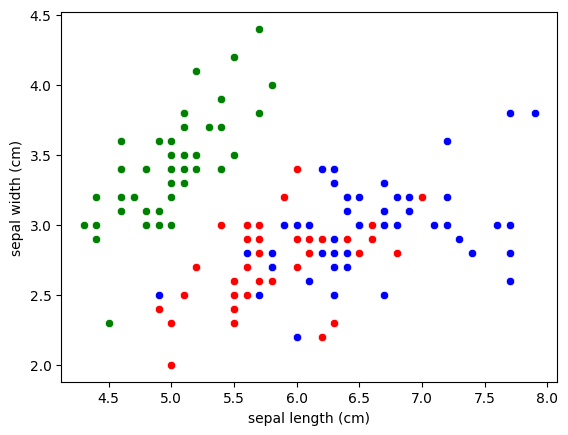

In [41]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=df0,color='green',marker='o')
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=df1,color='red',marker='o')
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=df2,color='blue',marker='o')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

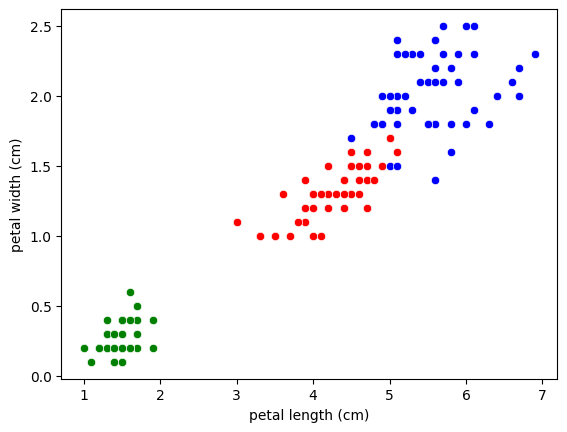

In [42]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df0,color='green',marker='o')
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df1,color='red',marker='o')
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df2,color='blue',marker='o')

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x=df.drop(['target','flower_name'],axis=1)

In [46]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y=df['target']

In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
len(x_train)

120

In [51]:
len(x_test)

30

In [52]:
from sklearn.svm import SVC

In [53]:
model=SVC()

In [55]:
model.fit(x_train,y_train)

SVC()

In [56]:
model.score(x_test,y_test)

0.9666666666666667